# <center>Credit Card Fraud Detection</center>

Ngô Văn Trung Nguyên

---
## Overview
This project foucuses on handling an unbalanced dataset and detecting credit card fraud using these Machine Learning algorithms:
- Logistic Regression
- Gaussian Naive Bayess
- Decision tree
- Support vector machine
- Random forest

These models are trained on different datasets after using RobustScalet, UnderSampling, OverSampling and SMOTE.

## Datasets
Link: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

---
## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

---
## Preprocessing

In [2]:
df = pd.read_csv('data/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.shape

(284807, 31)

In [4]:
# checking missing values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
df.isnull().values.any()

False

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### Dropping **Time** attribute

**Time**: "Number of seconds elapsed between this transaction and the first transaction in the dataset". This attribute has no use.

In [8]:
df = df.drop(['Time'], axis=1)

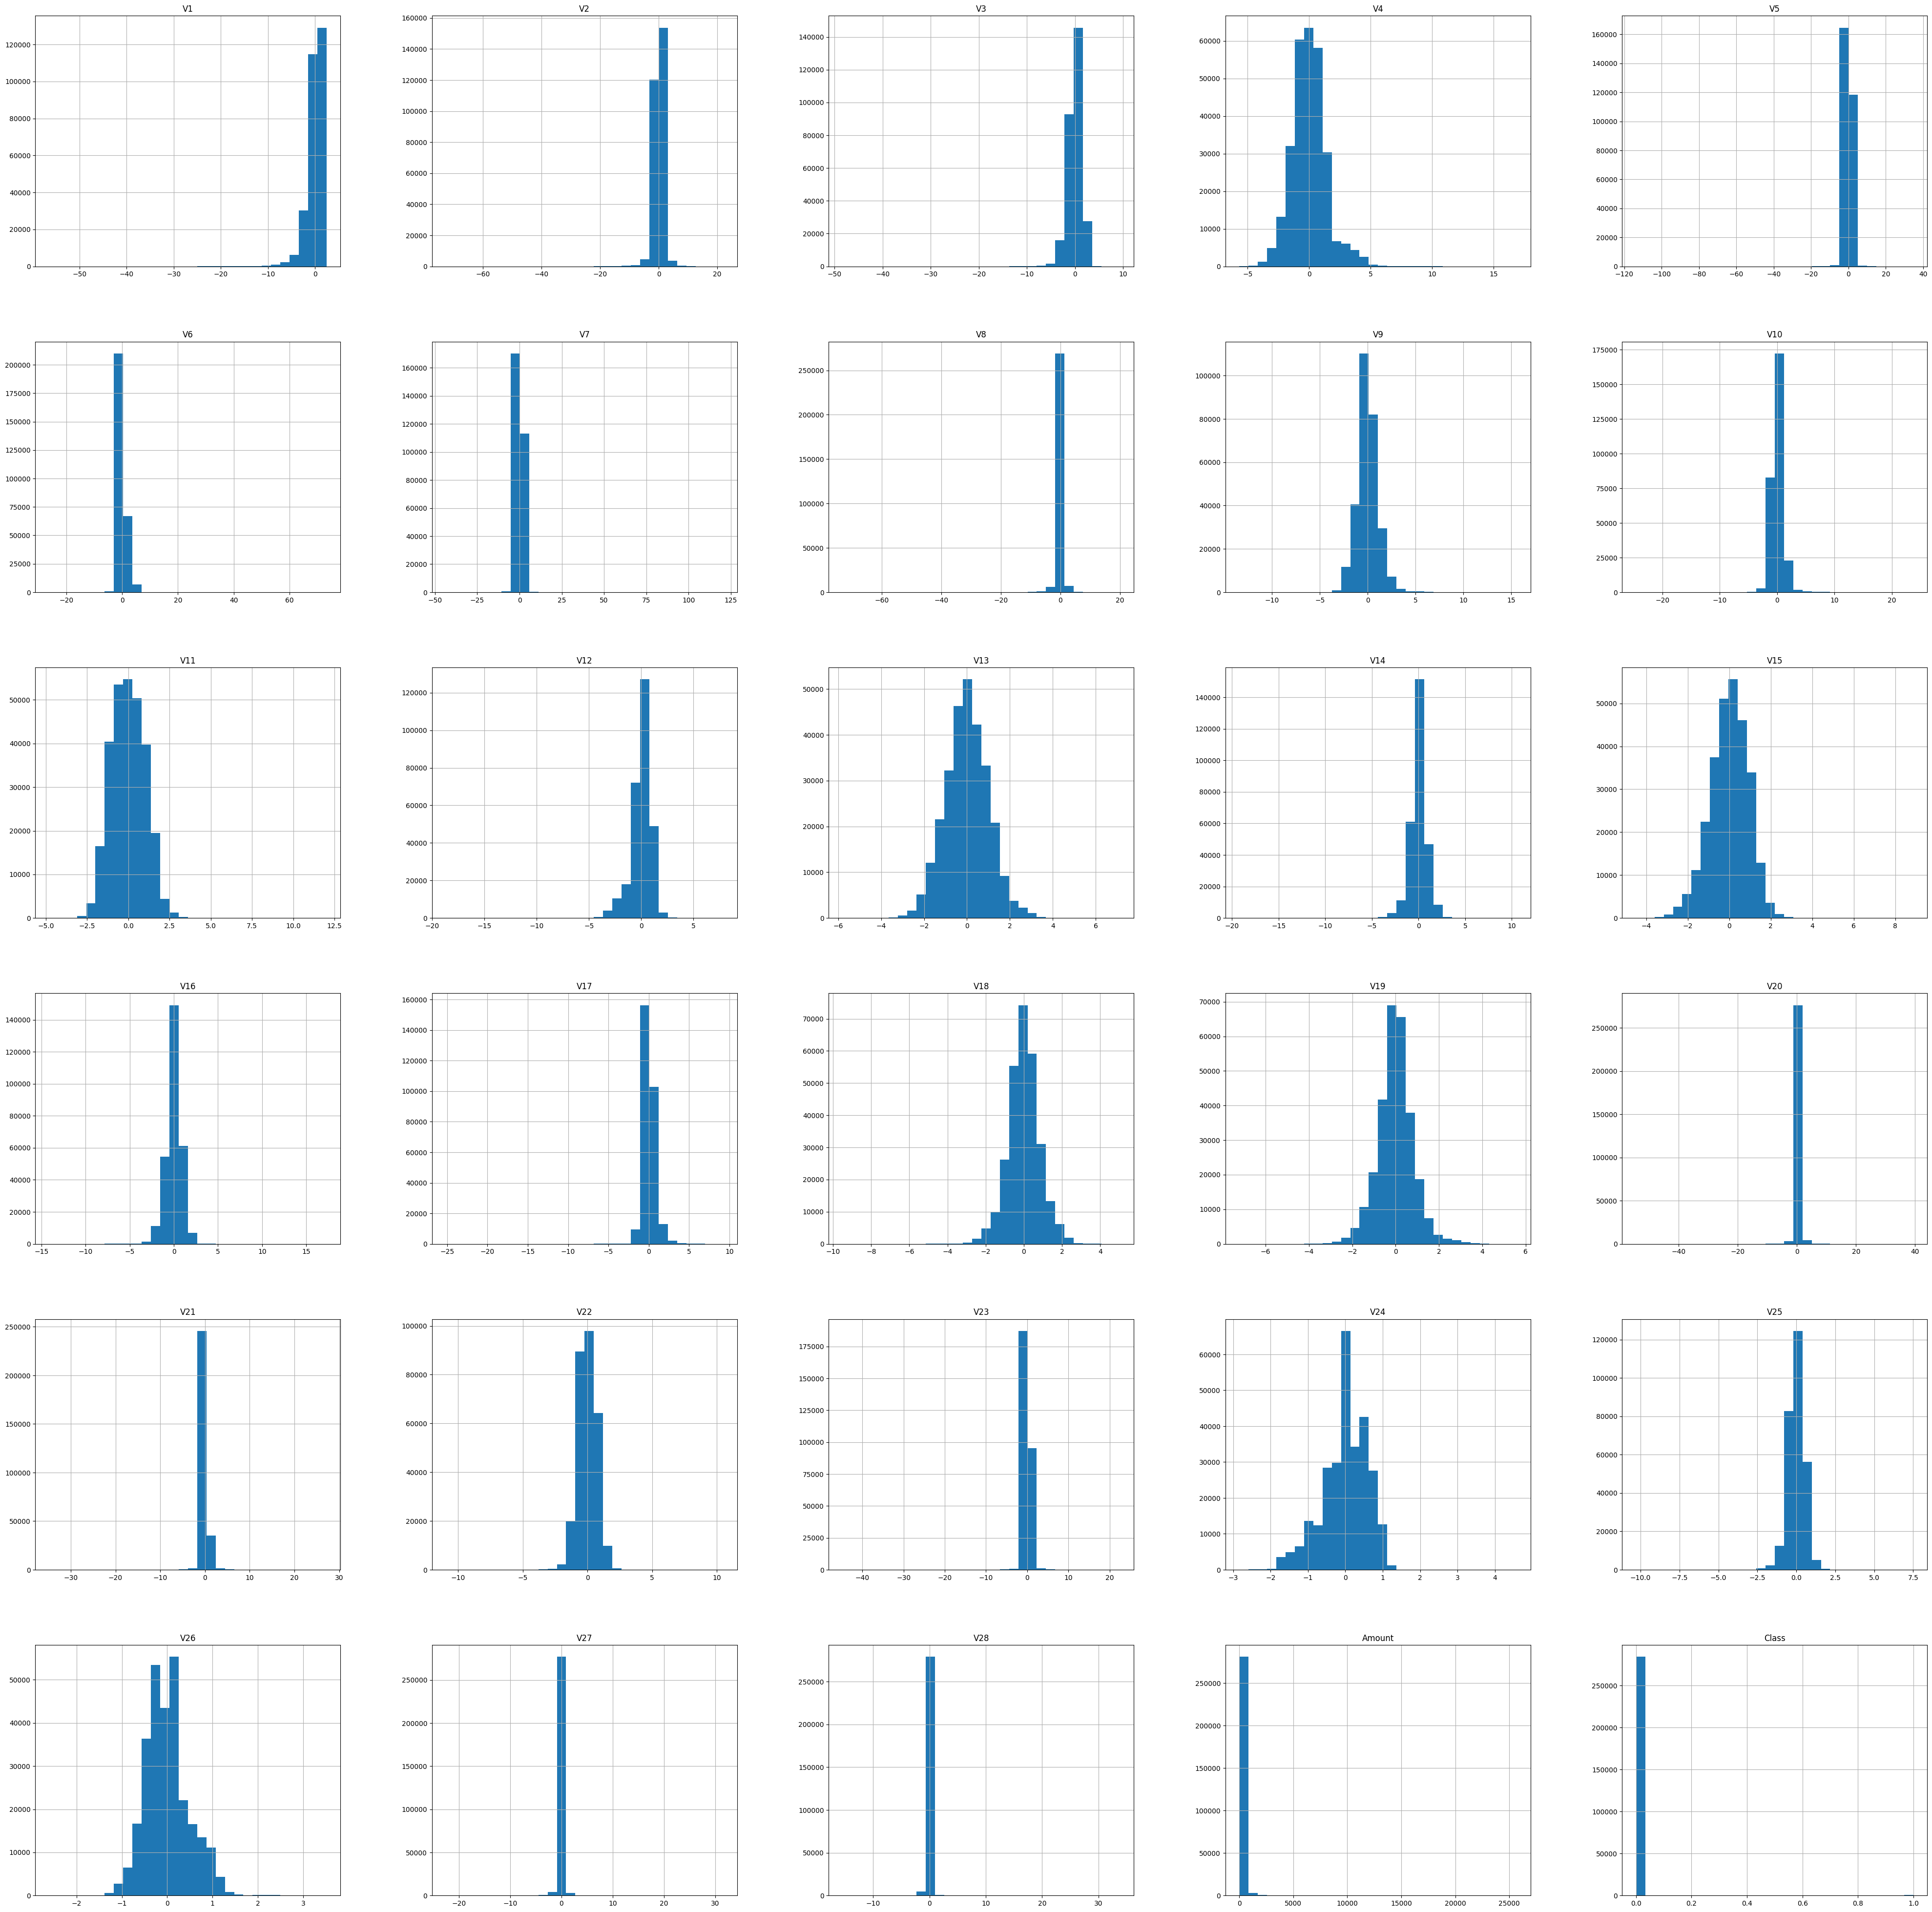

In [9]:
# checking the distribution
df.hist(bins=30, figsize=(50,50))
plt.show()

### Standardizing **Amount** attribute values using RobustScaler

Most of the attributes are distributed around 0. But the **Amount** attribute is heavily skewed to the right (min: 0 and max: 25691.16 while mean: 88.35). I will use RobustScaler for scaling **Amount**.

In [10]:
from sklearn.preprocessing import RobustScaler
scaled_df = df.copy()
scaled_df['Amount'] = RobustScaler().fit_transform(scaled_df['Amount'].values.reshape(-1, 1))

---
## Exploratoty Data Analysis (EDA)

In [11]:
# checking class distribution
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

Not Fraud:  99.83 %
Fraud:  0.17 %


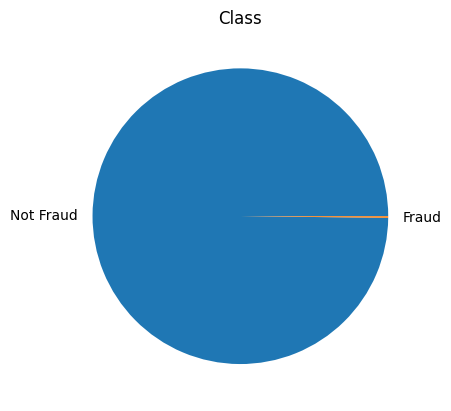

In [12]:
# calculate percentage
percentage = df.groupby('Class')['Class'].count() / df['Class'].count() * 100
print('Not Fraud: ', np.round(percentage[0], 2), '%')
print('Fraud: ', np.round(percentage[1], 2), '%')

plt.pie(percentage, labels=['Not Fraud', 'Fraud'])
plt.title("Class")
plt.show()

The dataset is highly unbalanced

Let's see some **Amount** statistics for Fraud and Not Fraud

In [13]:
pd.concat([df[df['Class'] == 1]['Amount'].describe().to_frame('Fraud'), df[df['Class'] == 0]['Amount'].describe().to_frame('Not Fraud')], axis=1)

,Fraud,Not Fraud
count,492.000000,284315.000000
mean,122.211321,88.291022
std,256.683288,250.105092
min,0.000000,0.000000
25%,1.000000,5.650000
50%,9.250000,22.000000
75%,105.890000,77.050000
max,2125.870000,25691.160000


Histogram

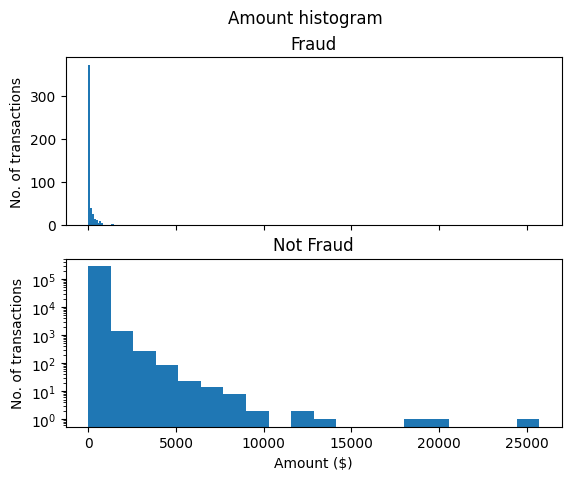

In [14]:
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True)
ax[0].hist(df[df['Class'] == 1]['Amount'], bins=20)
ax[0].set_title('Fraud')
ax[0].set_ylabel('No. of transactions')

ax[1].hist(df[df['Class'] == 0]['Amount'], bins=20)
ax[1].set_title('Not Fraud')
ax[1].set_ylabel('No. of transactions')
plt.yscale('log')
plt.xlabel('Amount ($)')

fig.suptitle('Amount histogram')
plt.show()

---
## Handling Imbalanced Data for Classification

Reference: https://www.geeksforgeeks.org/handling-imbalanced-data-for-classification/

### 1. Different Evaluation Metric

Classifier accuracy is calculated by dividing the total correct predictions by the overall predictions, suitable for balanced classes but less effective for imbalanced datasets. Precision gauges the accuracy of a classifier in predicting a specific class, while recall assesses its ability to correctly identify a class. In imbalanced datasets, the **F1 score** emerges as a preferred metric, striking a balance between precision and recall, providing a more comprehensive evaluation of a classifier’s performance.

### 2. Resampling (Undersampling and Oversampling)

In [15]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

X = scaled_df.drop('Class', axis=1)
y = scaled_df['Class']
print("Original class distribution: ", Counter(y))

undersample = RandomUnderSampler()
X_under, y_under = undersample.fit_resample(X, y)
print("Undersampled class distribution:", Counter(y_under))

oversample = RandomOverSampler()
X_over, y_over = oversample.fit_resample(X, y)
print("Oversampled class distribution:", Counter(y_over))

Original class distribution:  Counter({0: 284315, 1: 492})
Undersampled class distribution: Counter({0: 492, 1: 492})
Oversampled class distribution: Counter({0: 284315, 1: 284315})


### 3. SMOTE

In [16]:
from imblearn.over_sampling import SMOTE

print("Original class distribution: ", Counter(y))

smote = SMOTE(sampling_strategy='auto')
X_smote, y_smote = smote.fit_resample(X, y)
print("SMOTE class distribution:", Counter(y_smote))

Original class distribution:  Counter({0: 284315, 1: 492})


SMOTE class distribution: Counter({0: 284315, 1: 284315})


---
## Evaluation function

In [17]:
def evaluation(y_test, y_pred):
    cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
    class_names=[0,1]
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)

    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
    ax.xaxis.set_label_position("top")
    plt.title('Confusion matrix')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

    print(classification_report(y_test, y_pred, target_names=['Not Fraud', 'Fraud']))
    print("Accuracy score: ", metrics.accuracy_score(y_test, y_pred))
    print("F1 score: ", metrics.f1_score(y_test, y_pred))

---
## 1. Logistics Regression

In [18]:
def logisticregression(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)
    logreg  = LogisticRegression()
    logreg.fit(X_train, y_train)
    y_pred = logreg.predict(X_test)

    evaluation(y_test, y_pred)

### 1.1 Scaled dataset

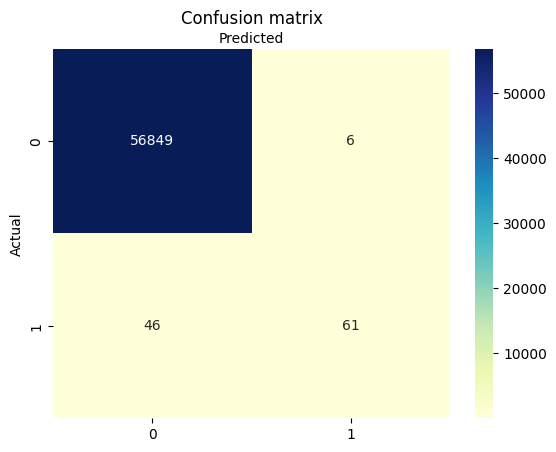

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     56855
       Fraud       0.91      0.57      0.70       107

    accuracy                           1.00     56962
   macro avg       0.95      0.78      0.85     56962
weighted avg       1.00      1.00      1.00     56962

Accuracy score:  0.9990871107053826
F1 score:  0.7011494252873564


In [19]:
logisticregression(X, y)

### 1.2. Undersampling dataset

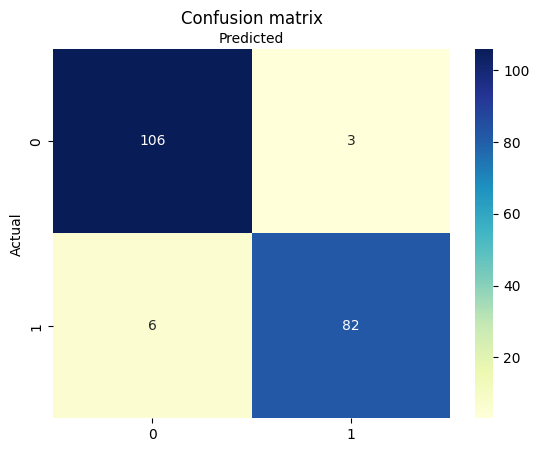

              precision    recall  f1-score   support

   Not Fraud       0.95      0.97      0.96       109
       Fraud       0.96      0.93      0.95        88

    accuracy                           0.95       197
   macro avg       0.96      0.95      0.95       197
weighted avg       0.95      0.95      0.95       197

Accuracy score:  0.9543147208121827
F1 score:  0.9479768786127167


In [20]:
logisticregression(X_under, y_under)

### 1.3. Oversampling dataset

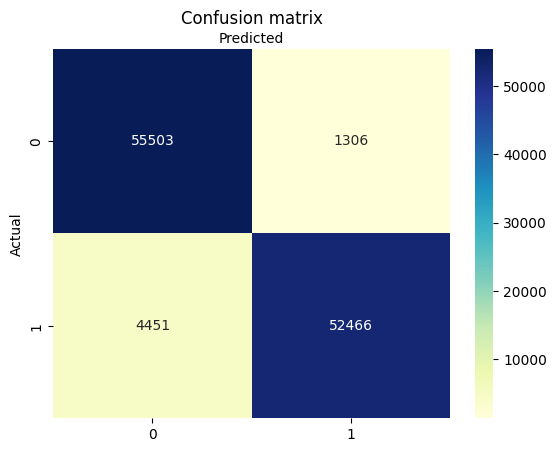

              precision    recall  f1-score   support

   Not Fraud       0.93      0.98      0.95     56809
       Fraud       0.98      0.92      0.95     56917

    accuracy                           0.95    113726
   macro avg       0.95      0.95      0.95    113726
weighted avg       0.95      0.95      0.95    113726

Accuracy score:  0.9493783303730018
F1 score:  0.9479894117753345


In [21]:
logisticregression(X_over, y_over)

### 1.4. SMOTE dataset

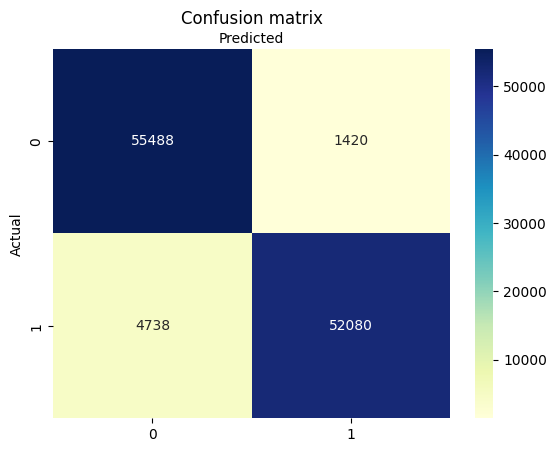

              precision    recall  f1-score   support

   Not Fraud       0.92      0.98      0.95     56908
       Fraud       0.97      0.92      0.94     56818

    accuracy                           0.95    113726
   macro avg       0.95      0.95      0.95    113726
weighted avg       0.95      0.95      0.95    113726

Accuracy score:  0.9458523116965337
F1 score:  0.9441795536539821


In [22]:
logisticregression(X_smote, y_smote)

---
## 2. Naive Bayess

In [23]:
def naivebayess(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)
    gnb = GaussianNB()
    gnb.fit(X_train, y_train)
    y_pred = gnb.predict(X_test)

    evaluation(y_test, y_pred)

### 2.1. Scaled dataset

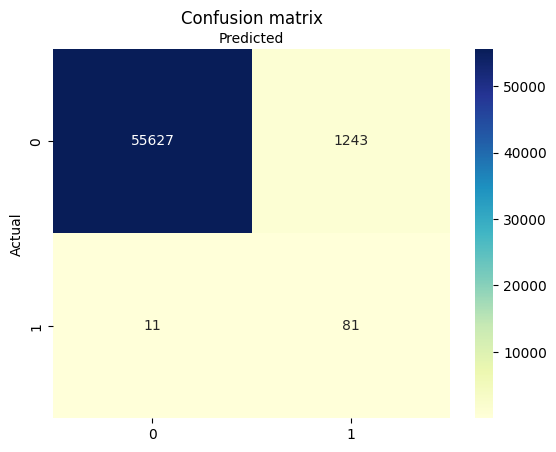

              precision    recall  f1-score   support

   Not Fraud       1.00      0.98      0.99     56870
       Fraud       0.06      0.88      0.11        92

    accuracy                           0.98     56962
   macro avg       0.53      0.93      0.55     56962
weighted avg       1.00      0.98      0.99     56962

Accuracy score:  0.9779853235490327
F1 score:  0.11440677966101695


In [24]:
naivebayess(X, y)

### 2.2. Undersampling dataset

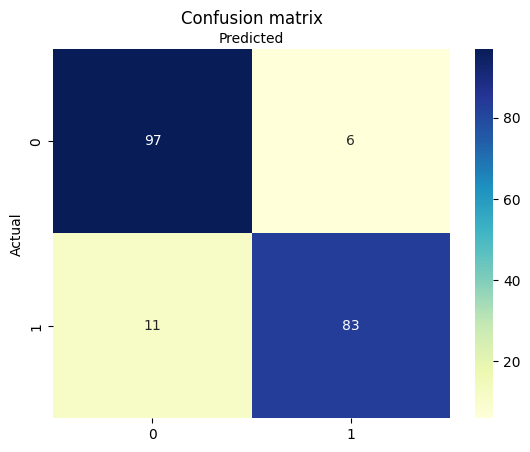

              precision    recall  f1-score   support

   Not Fraud       0.90      0.94      0.92       103
       Fraud       0.93      0.88      0.91        94

    accuracy                           0.91       197
   macro avg       0.92      0.91      0.91       197
weighted avg       0.91      0.91      0.91       197

Accuracy score:  0.9137055837563451
F1 score:  0.907103825136612


In [25]:
naivebayess(X_under, y_under)

### 2.3. Oversampling dataset

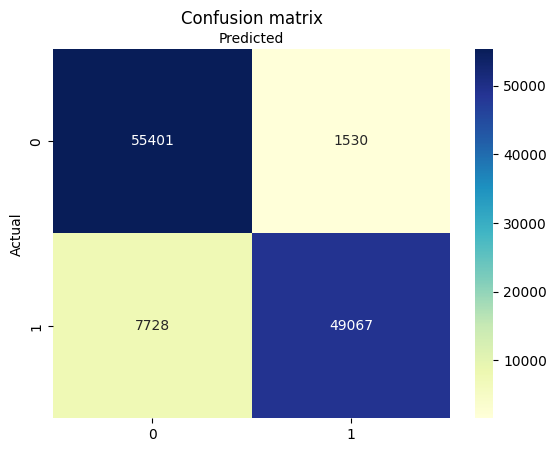

              precision    recall  f1-score   support

   Not Fraud       0.88      0.97      0.92     56931
       Fraud       0.97      0.86      0.91     56795

    accuracy                           0.92    113726
   macro avg       0.92      0.92      0.92    113726
weighted avg       0.92      0.92      0.92    113726

Accuracy score:  0.9185938132001478
F1 score:  0.9137924612634089


In [26]:
naivebayess(X_over, y_over)

### 2.4. SOMTE dataset

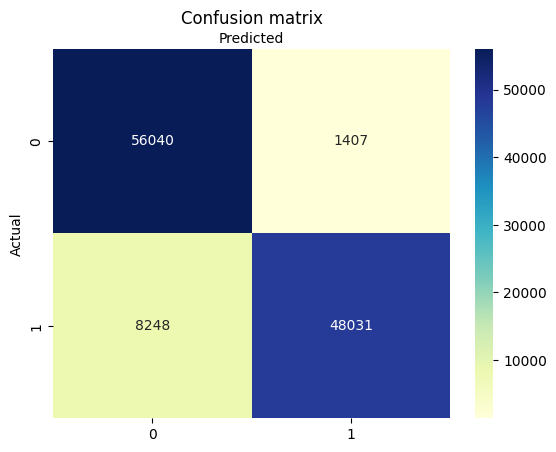

              precision    recall  f1-score   support

   Not Fraud       0.87      0.98      0.92     57447
       Fraud       0.97      0.85      0.91     56279

    accuracy                           0.92    113726
   macro avg       0.92      0.91      0.91    113726
weighted avg       0.92      0.92      0.91    113726

Accuracy score:  0.9151029667798041
F1 score:  0.9086712638459283


In [27]:
naivebayess(X_smote, y_smote)

---
## 3. Decision Tree

In [28]:
def decisionTree(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)
    dt = DecisionTreeClassifier()
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)

    evaluation(y_test, y_pred)

### 3.1. Scaled dataset

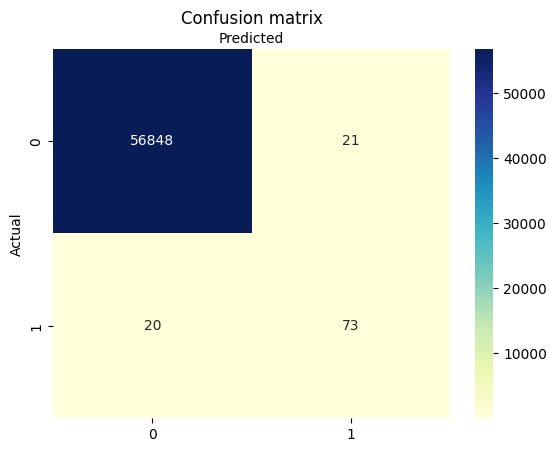

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     56869
       Fraud       0.78      0.78      0.78        93

    accuracy                           1.00     56962
   macro avg       0.89      0.89      0.89     56962
weighted avg       1.00      1.00      1.00     56962

Accuracy score:  0.9992802219023208
F1 score:  0.7807486631016043


In [29]:
decisionTree(X, y)

### 3.2. Undersampling dataset

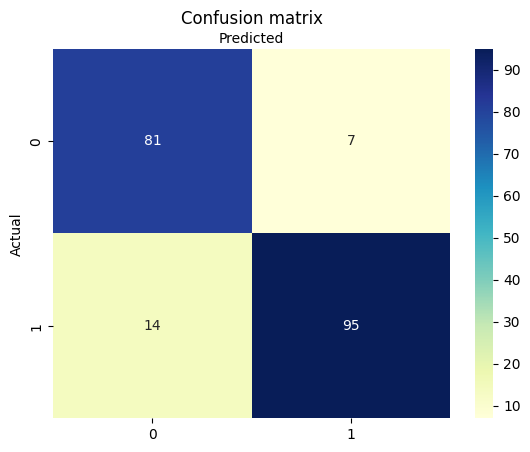

              precision    recall  f1-score   support

   Not Fraud       0.85      0.92      0.89        88
       Fraud       0.93      0.87      0.90       109

    accuracy                           0.89       197
   macro avg       0.89      0.90      0.89       197
weighted avg       0.90      0.89      0.89       197

Accuracy score:  0.8934010152284264
F1 score:  0.9004739336492891


In [30]:
decisionTree(X_under, y_under)

### 3.3. Oversampling dataset

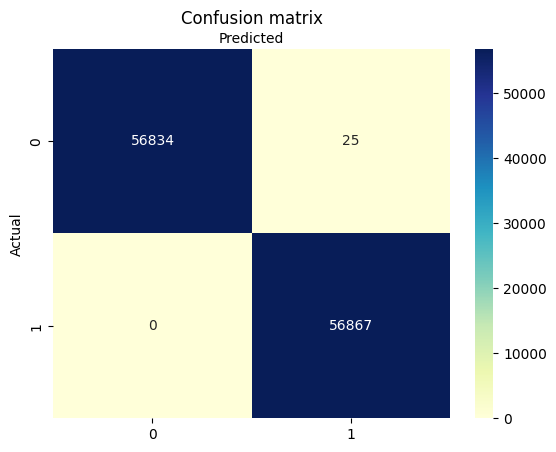

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     56859
       Fraud       1.00      1.00      1.00     56867

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726

Accuracy score:  0.9997801733992226
F1 score:  0.9997802371680482


In [31]:
decisionTree(X_over, y_over)

### 3.4. SMOTE dataset

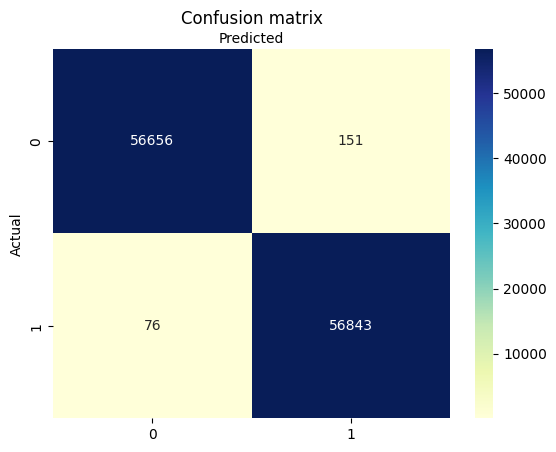

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     56807
       Fraud       1.00      1.00      1.00     56919

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726

Accuracy score:  0.998003974464942
F1 score:  0.9980072511478058


In [32]:
decisionTree(X_smote, y_smote)

---
## 4. Support Vector Machines

In [33]:
def SVM(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)
    svc = LinearSVC(class_weight='balanced')
    svc.fit(X_train, y_train)
    y_pred = svc.predict(X_test)

    evaluation(y_test, y_pred)

### 4.1. Scaled dataset

C:\Users\42nvt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


C:\Users\42nvt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


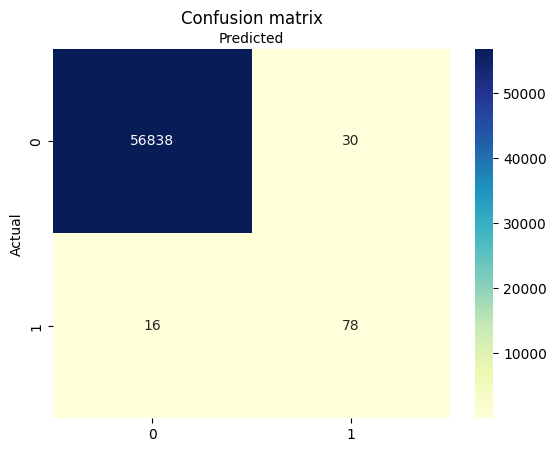

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     56868
       Fraud       0.72      0.83      0.77        94

    accuracy                           1.00     56962
   macro avg       0.86      0.91      0.89     56962
weighted avg       1.00      1.00      1.00     56962

Accuracy score:  0.9991924440855307
F1 score:  0.7722772277227723


In [34]:
SVM(X, y)

### 4.2. Undersampling dataset

C:\Users\42nvt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\42nvt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


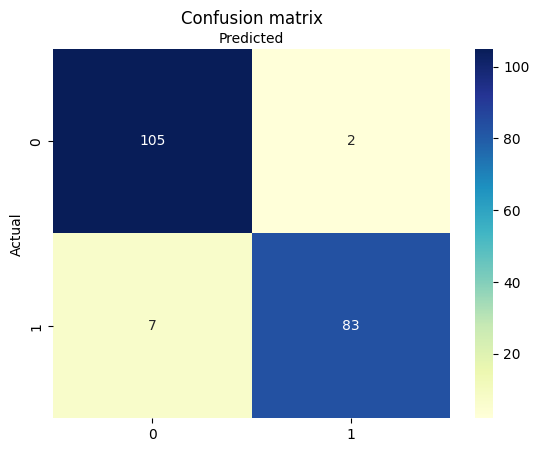

              precision    recall  f1-score   support

   Not Fraud       0.94      0.98      0.96       107
       Fraud       0.98      0.92      0.95        90

    accuracy                           0.95       197
   macro avg       0.96      0.95      0.95       197
weighted avg       0.96      0.95      0.95       197

Accuracy score:  0.9543147208121827
F1 score:  0.9485714285714286


In [35]:
SVM(X_under, y_under)

### 4.3. Oversampling dataset

C:\Users\42nvt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\42nvt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


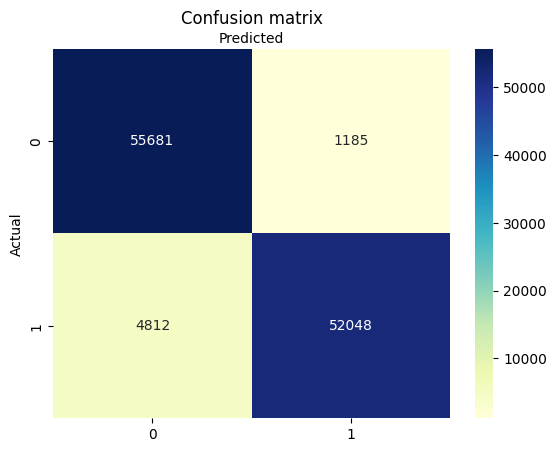

              precision    recall  f1-score   support

   Not Fraud       0.92      0.98      0.95     56866
       Fraud       0.98      0.92      0.95     56860

    accuracy                           0.95    113726
   macro avg       0.95      0.95      0.95    113726
weighted avg       0.95      0.95      0.95    113726

Accuracy score:  0.9472679950055396
F1 score:  0.9455278718901292


In [36]:
SVM(X_over, y_over)

### 4.4. SMOTE dataset

C:\Users\42nvt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\42nvt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


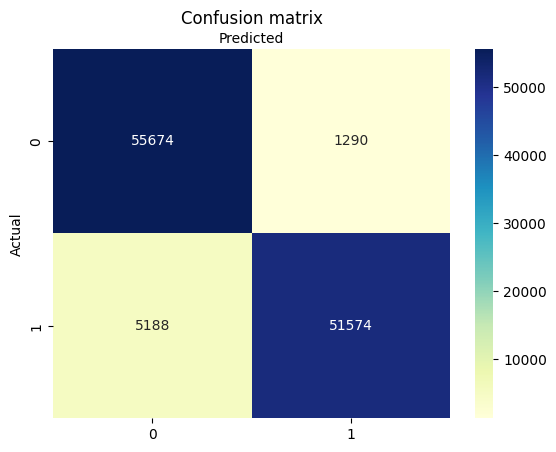

              precision    recall  f1-score   support

   Not Fraud       0.91      0.98      0.95     56964
       Fraud       0.98      0.91      0.94     56762

    accuracy                           0.94    113726
   macro avg       0.95      0.94      0.94    113726
weighted avg       0.95      0.94      0.94    113726

Accuracy score:  0.9430385312065842
F1 score:  0.9409081787167278


In [37]:
SVM(X_smote, y_smote)

---
## 5. Random Forest

In [38]:
def randomForest(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)
    rf = RandomForestClassifier(class_weight='balanced')
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)

    evaluation(y_test, y_pred)

### 5.1. Scaled dataset

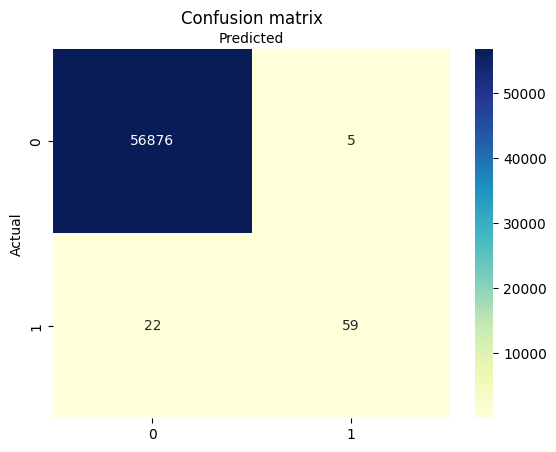

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     56881
       Fraud       0.92      0.73      0.81        81

    accuracy                           1.00     56962
   macro avg       0.96      0.86      0.91     56962
weighted avg       1.00      1.00      1.00     56962

Accuracy score:  0.9995259997893332
F1 score:  0.8137931034482758


In [39]:
randomForest(X, y)

### 5.2. Undersampling dataset

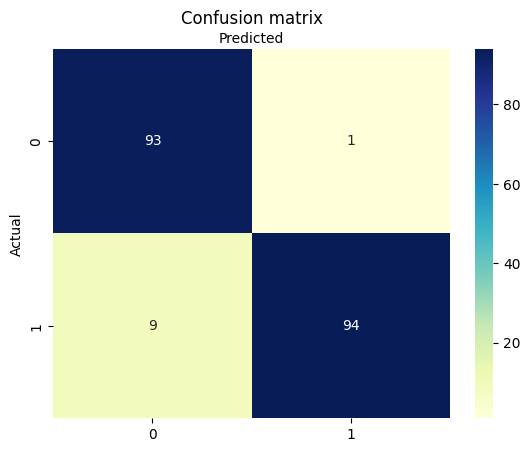

              precision    recall  f1-score   support

   Not Fraud       0.91      0.99      0.95        94
       Fraud       0.99      0.91      0.95       103

    accuracy                           0.95       197
   macro avg       0.95      0.95      0.95       197
weighted avg       0.95      0.95      0.95       197

Accuracy score:  0.949238578680203
F1 score:  0.9494949494949495


In [40]:
randomForest(X_under, y_under)

### 5.3. Oversampling dataset

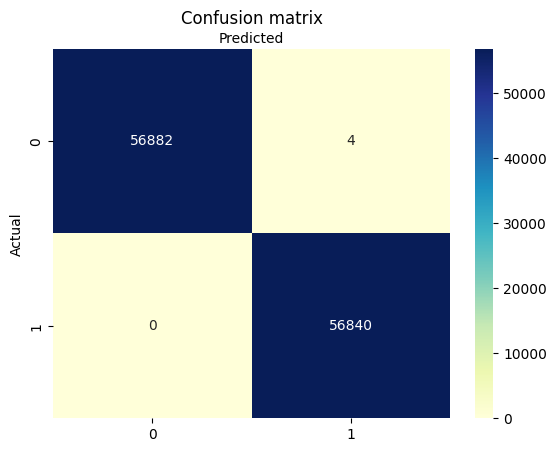

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     56886
       Fraud       1.00      1.00      1.00     56840

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726

Accuracy score:  0.9999648277438756
F1 score:  0.9999648147496569


In [41]:
randomForest(X_over, y_over)

### 5.4. SMOTE dataset

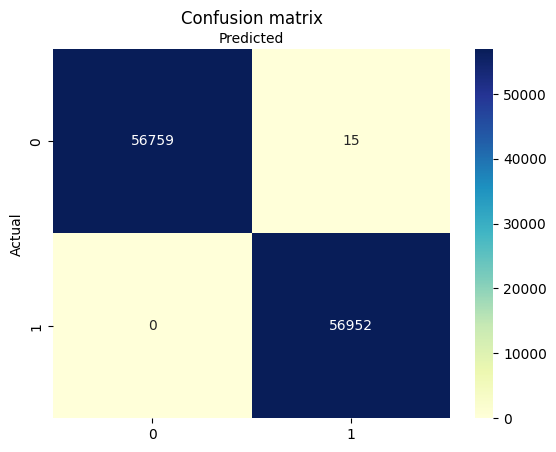

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     56774
       Fraud       1.00      1.00      1.00     56952

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726

Accuracy score:  0.9998681040395336
F1 score:  0.9998683274958523


In [42]:
randomForest(X_smote, y_smote)

---
## Conclusion

- For Scaled dataset, because this dataset is highly unbalanced, i will only check F1 score. Random Forest with highest F1 score: 81.38% works most efficiently.
- For UnderSampling, having too little data can lead to underfitting (only 492 values total). Let's ignore the result.
- For OverSampling and SMOTE, Decision Tree and Random Forest with accuracy more than 99%, both of them work most efficiently.